In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv('BTCUSDT_2019.csv')

dataset_train['date'] = pd.to_datetime(dataset_train['date'], unit='s')

training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,date,low,high,open,close,volume
0,2019-01-01 00:00:00,3701.23,3703.72,3701.09,3702.46,17.100110
1,2019-01-01 00:01:00,3702.44,3702.63,3695.66,3697.04,23.700604
2,2019-01-01 00:02:00,3699.42,3702.04,3696.08,3698.14,14.488615
3,2019-01-01 00:03:00,3697.49,3698.19,3695.97,3696.51,8.499966
4,2019-01-01 00:04:00,3697.20,3697.62,3695.00,3696.32,21.782886


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1975/1975 [==============================] - 6s 3ms/step - loss: 6.3805e-05
Epoch 2/50
1975/1975 [==============================] - 5s 2ms/step - loss: 1.9007e-05
Epoch 3/50
1975/1975 [==============================] - 5s 3ms/step - loss: 1.5798e-05
Epoch 4/50
1975/1975 [==============================] - 5s 3ms/step - loss: 1.2769e-05
Epoch 5/50
1975/1975 [==============================] - 5s 2ms/step - loss: 7.0092e-06
Epoch 6/50
1975/1975 [==============================] - 5s 3ms/step - loss: 4.1709e-06
Epoch 7/50
1975/1975 [==============================] - 5s 3ms/step - loss: 4.0973e-06
Epoch 8/50
1975/1975 [==============================] - 5s 3ms/step - loss: 2.8890e-06
Epoch 9/50
1975/1975 [==============================] - 5s 3ms/step - loss: 2.4115e-06
Epoch 10/50
1975/1975 [==============================] - 5s 3ms/step - loss: 2.6656e-06
Epoch 11/50
1975/1975 [==============================] - 5s 2ms/step - loss: 2.0949e-06
Epoch 12/50
1975/1975 [==================

In [9]:
dataset_test = pd.read_csv('BTCUSDT_2019.csv')

dataset_train['date'] = pd.to_datetime(dataset_train['date'], unit='s')

real_bitcoin_price = dataset_test.iloc[:, 1:2].values

In [10]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_bitcoin_price = model.predict(X_test)
predicted_bitcoin_price = sc.inverse_transform(predicted_bitcoin_price)

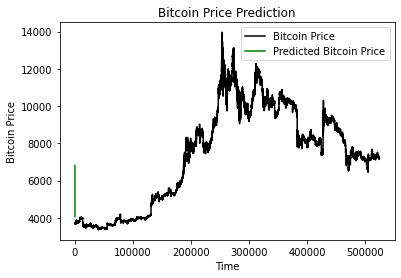

In [11]:
plt.plot(real_bitcoin_price, color = 'black', label = 'Bitcoin Price')
plt.plot(predicted_bitcoin_price, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()